# <center> Use Sklearn to Train a K-Nearest Neighbours (KNN) Model <br> ~ Purchasing Dataset ~</center>
<center>by: Nicole Woodland, P. Eng. for RoboGarden Inc. </center>

---

In this notebook, we will train a KNN model using SciKit Learn. We will follow the Machine Learning Workflow to:
- Collect and read in data
- Explore the data and investigate patterns and relationships
- Clean the data and perform and necessary preprocessing
- Create Training and Test Data
- Train a KNN Model
- Evaluate the KNN Model and Visualize it's performance
- Optimize the KNN Model and Select a Preferred Model for "deployment"

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Step 1: Read the data into a Dataframe

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")

In [5]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

## Step 2: Visualize the data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn

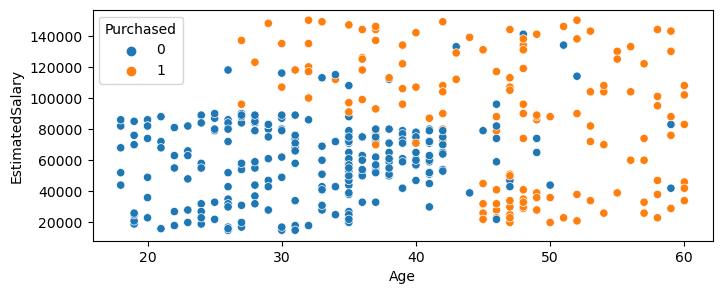

In [9]:
plt.figure(figsize=(8,3))
sn.scatterplot(data = df, x = df["Age"], 
               y = df["EstimatedSalary"], hue=df["Purchased"])
plt.show()

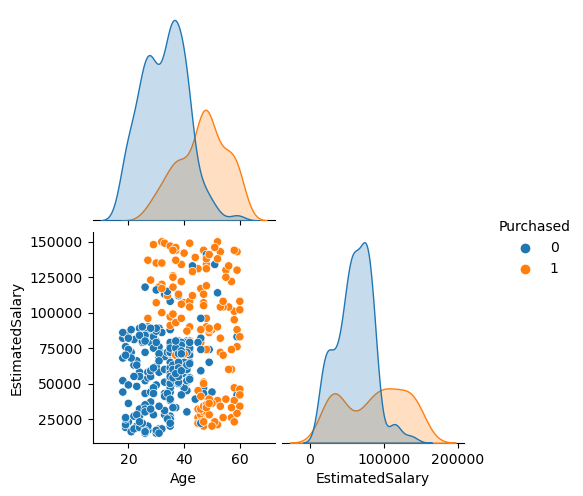

In [10]:
sn.pairplot(df, hue = "Purchased", corner=True)

In [11]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<AxesSubplot:>

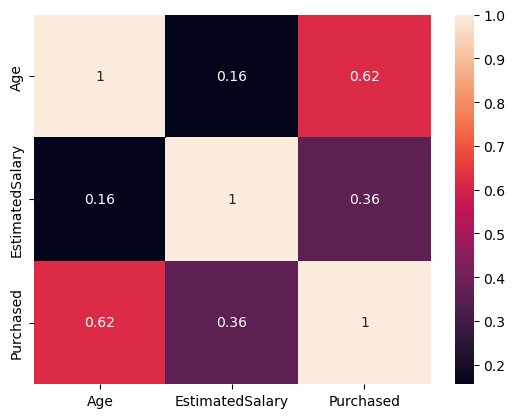

In [12]:
sn.heatmap(df.corr(), annot = True)

## Step 3: Define Input and Output Data

In [14]:
x_columns = len(df.columns)-1

X = df.iloc[:, 0:x_columns].values
y = df.iloc[:,x_columns].values

## Step 4: Perform any Preprocessing

In [16]:
# Encoding ? No labels in our inputs, so no Encoding is required
# But - we should scale because the salary data is higher

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_scaled = scaler.fit_transform(X)

In [19]:
# Check the data swas scaled!
X[0], X_scaled[0]

(array([   19, 19000], dtype=int64), array([-1.78179743, -1.49004624]))

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size = 0.25,
                                                   random_state = 0)

In [21]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

300 300 100 100


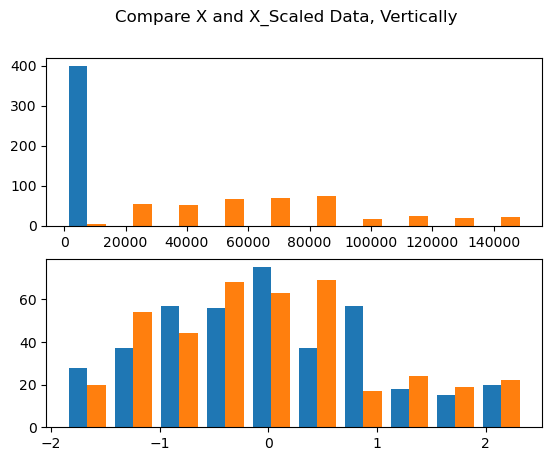

In [22]:
figv, axs = plt.subplots(2,1)
figv.suptitle("Compare X and X_Scaled Data, Vertically")

axs[0].hist(X)
axs[1].hist(X_scaled)

plt.show() 

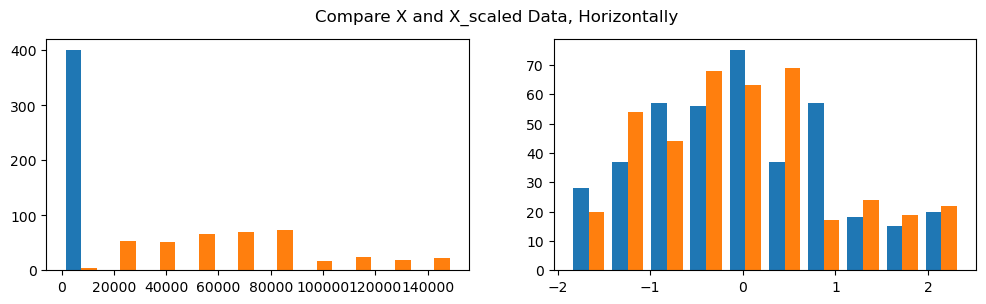

In [23]:
figh,(ax1, ax2) = plt.subplots(1,2, figsize = (12,3))
figh.suptitle("Compare X and X_scaled Data, Horizontally")

ax1.hist(X)
ax2.hist(X_scaled)
plt.show()

** Note that we use a **histogram** here because we want to see the quantity of values falling into bins for a continuous variable (salary). If we wanted to see the distribution of 'Purchased', use a countplot, because it is a categorical column.

## Step 5: Train a KNN Classification Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)

In [27]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
predictions = model.predict(X_test)

In [29]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

## Step 6: Evaluate the Model

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(y_true = y_test,
                       y_pred = predictions))

[[64  4]
 [ 3 29]]


Text(0.5, 1.0, 'Purchasing Predictions Heat Map')

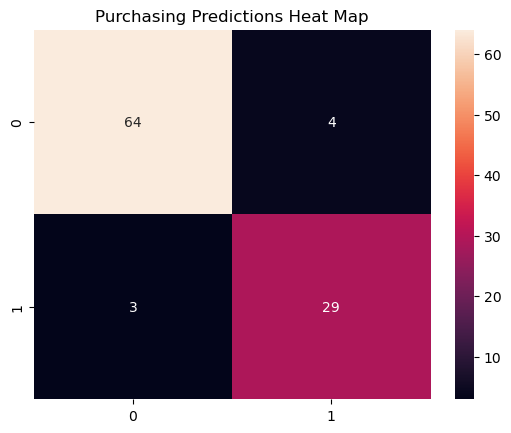

In [33]:
sn.heatmap(confusion_matrix(y_test,predictions), annot = True).set_title("Purchasing Predictions Heat Map")

In [35]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [36]:
print("True Positives:",tp)
print("True Negatives:", tn)

True Positives: 29
True Negatives: 64


In [123]:
# Calculate the accuracy of the model on the training data and the testing data. How does the performance compare?
print(model.score(X_train, y_train).round(2))
print(model.score(X_test, y_test).round(2))

0.92
0.93


## Step 7: Visualize the Test Data

Note: Because we scaled the entire dataset at once, we need to unscale the datapoints that ended up in our 'test data' if we want to visualize the results in it's original feature space:

In [38]:
# Right now, X_test is scaled:
X_test

array([[-0.73115301,  0.50676401],
       [ 0.03295203, -0.57973568],
       [-0.25358736,  0.15438573],
       [-0.73115301,  0.27184516],
       [-0.25358736, -0.57973568],
       [-1.01769239, -1.46068138],
       [-0.63563988, -1.60750566],
       [-0.15807423,  2.18056084],
       [-1.87731056, -0.05116826],
       [ 0.89257019, -0.78528968],
       [-0.73115301, -0.60910054],
       [-0.92217926, -0.4329114 ],
       [-0.0625611 , -0.4329114 ],
       [ 0.12846516,  0.21311545],
       [-1.6862843 ,  0.47739916],
       [-0.54012675,  1.38770971],
       [-0.0625611 ,  0.21311545],
       [-1.78179743,  0.4480343 ],
       [ 1.65667523,  1.76945285],
       [-0.25358736, -1.40195167],
       [-0.25358736, -0.66783025],
       [ 0.89257019,  2.18056084],
       [ 0.31949142, -0.55037082],
       [ 0.89257019,  1.03533143],
       [-1.39974491, -1.22576253],
       [ 1.08359645,  2.09246627],
       [-0.92217926,  0.50676401],
       [-0.82666613,  0.30121002],
       [-0.0625611 ,

In [39]:
# Undo a scaling operation using inverse_transform() method
X_test_orig = scaler.inverse_transform(X_test)

In [40]:
# Define functions to get each column of data
def Extract0(lst):
    return [item[0] for item in lst]

def Extract1(lst):
    return [item[1] for item in lst]
      
# Extract the values
lst = X_test_orig
print(Extract0(lst))
print(Extract1(lst))

age = Extract0(lst)
salary = Extract1(lst)

[30.0, 38.0, 35.0, 30.0, 35.0, 27.0, 31.0, 36.0, 18.0, 47.0, 30.0, 28.0, 37.0, 39.0, 20.0, 32.0, 37.0, 19.0, 55.0, 35.0, 35.0, 47.0, 41.0, 47.0, 23.0, 49.0, 28.0, 29.0, 37.0, 32.0, 21.0, 37.0, 57.0, 37.0, 24.0, 18.0, 22.0, 34.0, 31.0, 49.0, 27.0, 41.0, 27.0, 35.0, 43.0, 27.0, 37.0, 52.0, 26.0, 49.0, 57.0, 34.0, 35.0, 34.0, 59.0, 45.0, 29.0, 26.0, 49.0, 23.0, 32.0, 60.0, 19.0, 36.0, 19.0, 60.0, 24.0, 27.0, 40.0, 42.0, 32.0, 35.0, 22.0, 45.0, 27.0, 18.0, 42.0, 40.0, 53.0, 47.0, 58.0, 59.0, 24.0, 26.0, 58.0, 42.0, 40.0, 59.0, 46.0, 41.0, 42.0, 37.0, 23.0, 25.0, 24.0, 27.0, 23.0, 48.0, 48.0, 42.0]
[87000.0, 50000.0, 75000.0, 79000.0, 50000.0, 20000.0, 15000.0, 144000.0, 68000.0, 43000.0, 49000.0, 55000.0, 55000.0, 77000.0, 86000.0, 117000.0, 77000.0, 85000.0, 130000.0, 22000.0, 47000.0, 144000.0, 51000.0, 105000.0, 28000.0, 141000.0, 87000.0, 80000.0, 62000.0, 86000.0, 88000.0, 79000.0, 60000.0, 53000.0, 58000.0, 52000.0, 81000.0, 43000.0, 34000.0, 36000.0, 88000.0, 52000.0, 84000.0, 20000

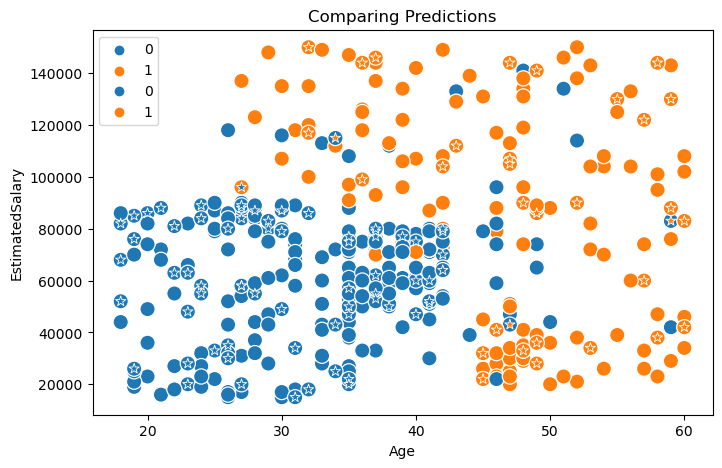

In [41]:
plt.figure(figsize=(8,5))

sn.scatterplot(data = df, x =df["Age"], y = df["EstimatedSalary"], 
               hue = df["Purchased"], s = 120).set_title("Comparing Predictions")

sn.scatterplot(x = age, y =salary, hue = predictions, marker = "*", s = 60)
plt.show()


## Step 8a: Optimize the KNN Model

In [93]:
# Make a loop to run a range of nearest neighbours to find the best model

err_rate = []
accuracy = []

# Calculate multiple models:
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predictions_i = knn.predict(X_test)

    # and Track the results!
    err_rate.append(np.mean(predictions_i != y_test)) # another way to calculate the error rate
    accuracy.append(knn.score(X_test, y_test))

In [95]:
err_rate

[0.12,
 0.11,
 0.07,
 0.08,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.08,
 0.08,
 0.08,
 0.08,
 0.09,
 0.08,
 0.09,
 0.08,
 0.08,
 0.08,
 0.09,
 0.08,
 0.09,
 0.08,
 0.1,
 0.09,
 0.1,
 0.1,
 0.1,
 0.1,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.12,
 0.12,
 0.11,
 0.12,
 0.11,
 0.12,
 0.11,
 0.11,
 0.1,
 0.11,
 0.12,
 0.12,
 0.12,
 0.12,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.14,
 0.14,
 0.15,
 0.15,
 0.16]

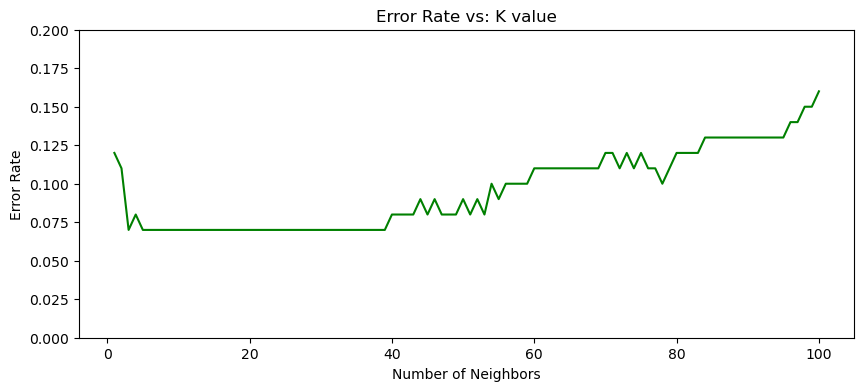

In [97]:
plt.figure(figsize = (10,4))

plt.plot(range(1,101), err_rate, color ="green" )
plt.ylim(0, 0.2)
plt.title("Error Rate vs: K value")
plt.xlabel("Number of Neighbors")
plt.ylabel("Error Rate")

plt.show()

In [46]:
min(err_rate)

0.07

In [47]:
best_knn = err_rate.index(0.07) + 1     #Could use 'min(err_rate)' instead of hardcoding 0.07 
print(best_knn)

3


In [48]:
# Run the best model

best_knn_model = KNeighborsClassifier(n_neighbors = best_knn)
best_knn_model.fit(X_train, y_train)
#predictions_best = best_knn_model.predict(X_test)

print(best_knn_model.score(X_test, y_test))

0.93


## Step 8b: Optional further optimization would be to try other distance measures:

https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

KNN default: 'metric' = 'minkowski', p = 2 

Minkowski is a blended calculation, and is based on the requested p value and uses an equivalent formula to: 
- cityblock (p = 1 , also known as Manhattan), the sum of the **absolute values** of the distance
- euclidean (p = 2 (default), the **straight-line** distance between two points in space)
- Minkowski, (p > 2 , the more general form of minkowski distance, often used to increase the weight of larger differences between coordinates.)

In [100]:
best_knn_model = KNeighborsClassifier(n_neighbors = best_knn, metric = "cityblock")
best_knn_model.fit(X_train, y_train)
#predictions_best = best_knn_model.predict(X_test)

print(best_knn_model.score(X_test, y_test))

0.93


In [102]:
best_knn_model = KNeighborsClassifier(n_neighbors = best_knn, metric = "euclidean")
best_knn_model.fit(X_train, y_train)
#predictions_best = best_knn_model.predict(X_test)

print(best_knn_model.score(X_test, y_test))

0.93


In [106]:
best_knn_model = KNeighborsClassifier(n_neighbors = best_knn, metric = "minkowski", p=3)
best_knn_model.fit(X_train, y_train)
#predictions_best = best_knn_model.predict(X_test)

print(best_knn_model.score(X_test, y_test))

0.93


#### There's no difference here so stick to the default! And we're done!